# MACHINE LEARNING 1 to 6: Assignment 1 

# 2.1. Problem Statement: Machine Learning 1 

# 1. What are the three stages to build the hypotheses or model in machine learning? 

*** The three stages to build the hypotheses or model in machine learning are:

a.	Model building – Select the model on this basis of the target variable.

b.	Model testing, Evaluation and Optimization– Test the model for minimizing loss function (bias-variance error) by selection or deletion or modification of features(columns), Train-Test split and modifying parameters (or hyper-parameters). This is done through various performance metrics based on type of ML algorithm(model) used.

c.	Deploying the model


# 2. What is the standard approach to supervised learning? 

****The standard approach to supervised learning is to Identify predictors and target variables, split the dataset in consideration, into the training set and the test set. It is done because the dataset provides the facility to test one’s model with the data present in the dataset. Build the model using train set data and evaluate the model using test set data.

# 3. What is Training set and Test set? 

**** Training set: The set of data that is used to discover the potentially predictive relationship between input and outputs of a model is known as ‘Training Set’.  It is a set of known inputs and outputs used to train the machine. It lets the model(algorithm) identify patterns in the data and create rules for predicting the output.

Test set: The set of data that is used to check how well the model works after it is trained with the training set is known as ‘Test set’. It is used to check the accuracy of the hypotheses generated by the model as well as other performance metrics after learning from the training set data.


# 4. What is the general principle of an ensemble method and what is bagging and boosting in ensemble method

*** The general principle of an ensemble method is to combine the predictions of several models built with a given learning algorithm to improve robustness over a single model. This is achieved by bagging and boosting.

Bagging is an abbreviation for "bootstrap aggregating". It's meta-algorithm, which takes M subsamples (with replacement) from the initial dataset and trains the predictive model on those subsamples. The final model is obtained by averaging the "bootstrapped" models and usually yields better results.


Boosting is a method that builds weak learners into strong ensembles by focusing iterations on the error terms of the previous iteration. Boosting is used sequentially to reduce the bias of the combined model. 


# 5.	How can you avoid overfitting?

Overfitting can be avoided by using the following methods:
a.	Using a lot of training data: By using a dataset containing a lot of training data, overfitting can be avoided. Overfitting happens when you have a small dataset, and you try to learn from it. 

b.	Cross Validation: If you have a small dataset and you are forced to come with a model based on that. In such situation, one can use cross validation to avoid overfitting.  

c.	Regularization:  Using models such as Lasso, Ridge and Elasticnet  

d.	Using Feature Engineering and Feature Selection methods


# 2.2. Problem Statement: Machine Learning 2

#  Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

# Use BOSTON data to linear regression model

In [7]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

# Machine learning libaries 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston


boston = load_boston()
bos = pd.DataFrame(boston.data)



In [12]:
# 1 Understanding the dataset

bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
bos.shape

(506, 13)

In [16]:
bos.info

<bound method DataFrame.info of            0     1      2    3      4      5      6       7     8      9   \
0     0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  0.0  0.524  6.00

In [19]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [21]:
print(boston.keys()) # Very impoortant the keys or dictionaries for the data set.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [22]:
print(bos.keys())

RangeIndex(start=0, stop=13, step=1)


In [23]:
print(bos)

           0     1      2    3      4      5      6       7     8      9   \
0     0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  0.0  0.524  6.009   82.9  6.2267   5.0  311.0   

In [20]:
boston.data.shape

(506, 13)

In [24]:
print(boston.feature_names) # columns 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [25]:
print(boston.DESCR) # Descreption of the colums names in the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
# Renaming the coloumn names with feature names in the database
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
# adding traget column as price t0 the dataset
boston.target.shape

(506,)

In [30]:
bos['Price']= boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
bos.info() # check null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [32]:
print(bos.describe()) # All the columns are NUMERICAL. There is no categorical data to consider

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# Exploratory Analysis of the data

In [33]:
# Correlation
bos_corr = bos.corr()
bos_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


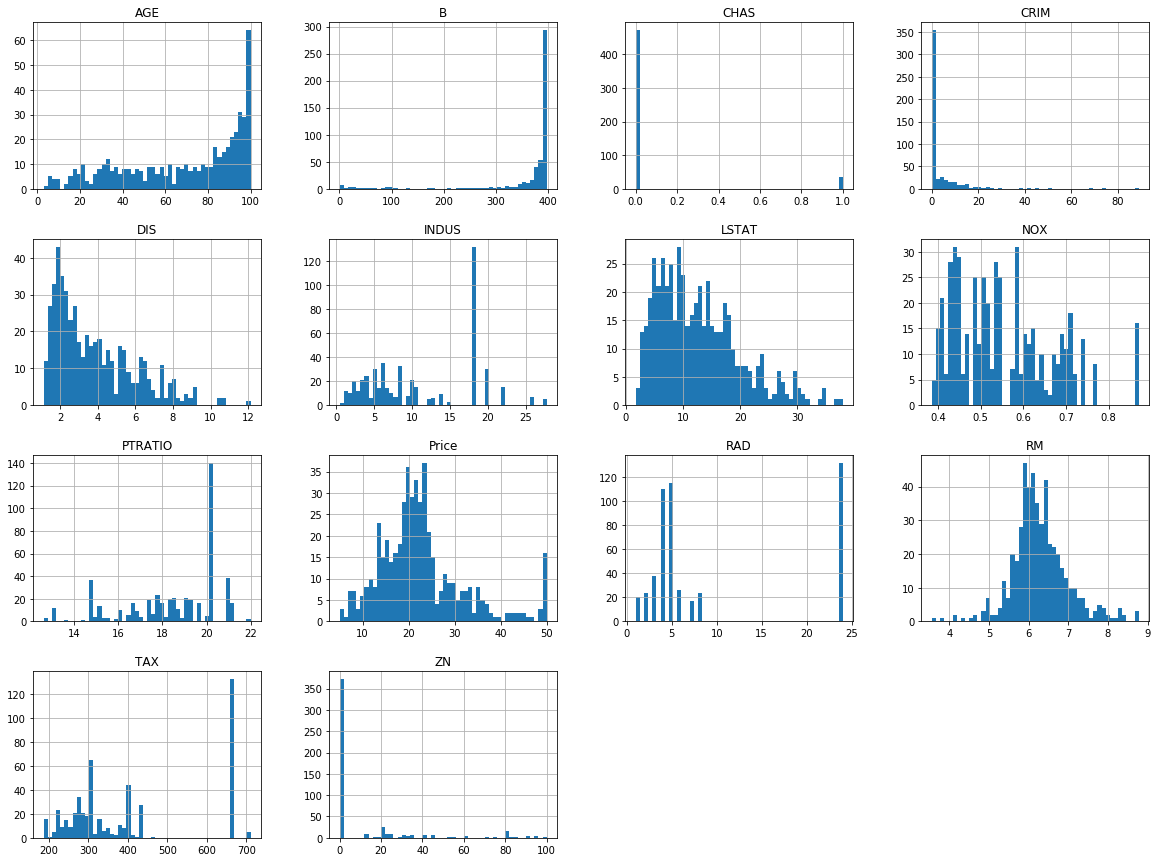

In [34]:
# Plotting the histogram of the data to understand the frequency distribution of the data
bos.hist(bins=50,figsize=(20,15))
plt.show()

# Understand the relation between different columns in the data

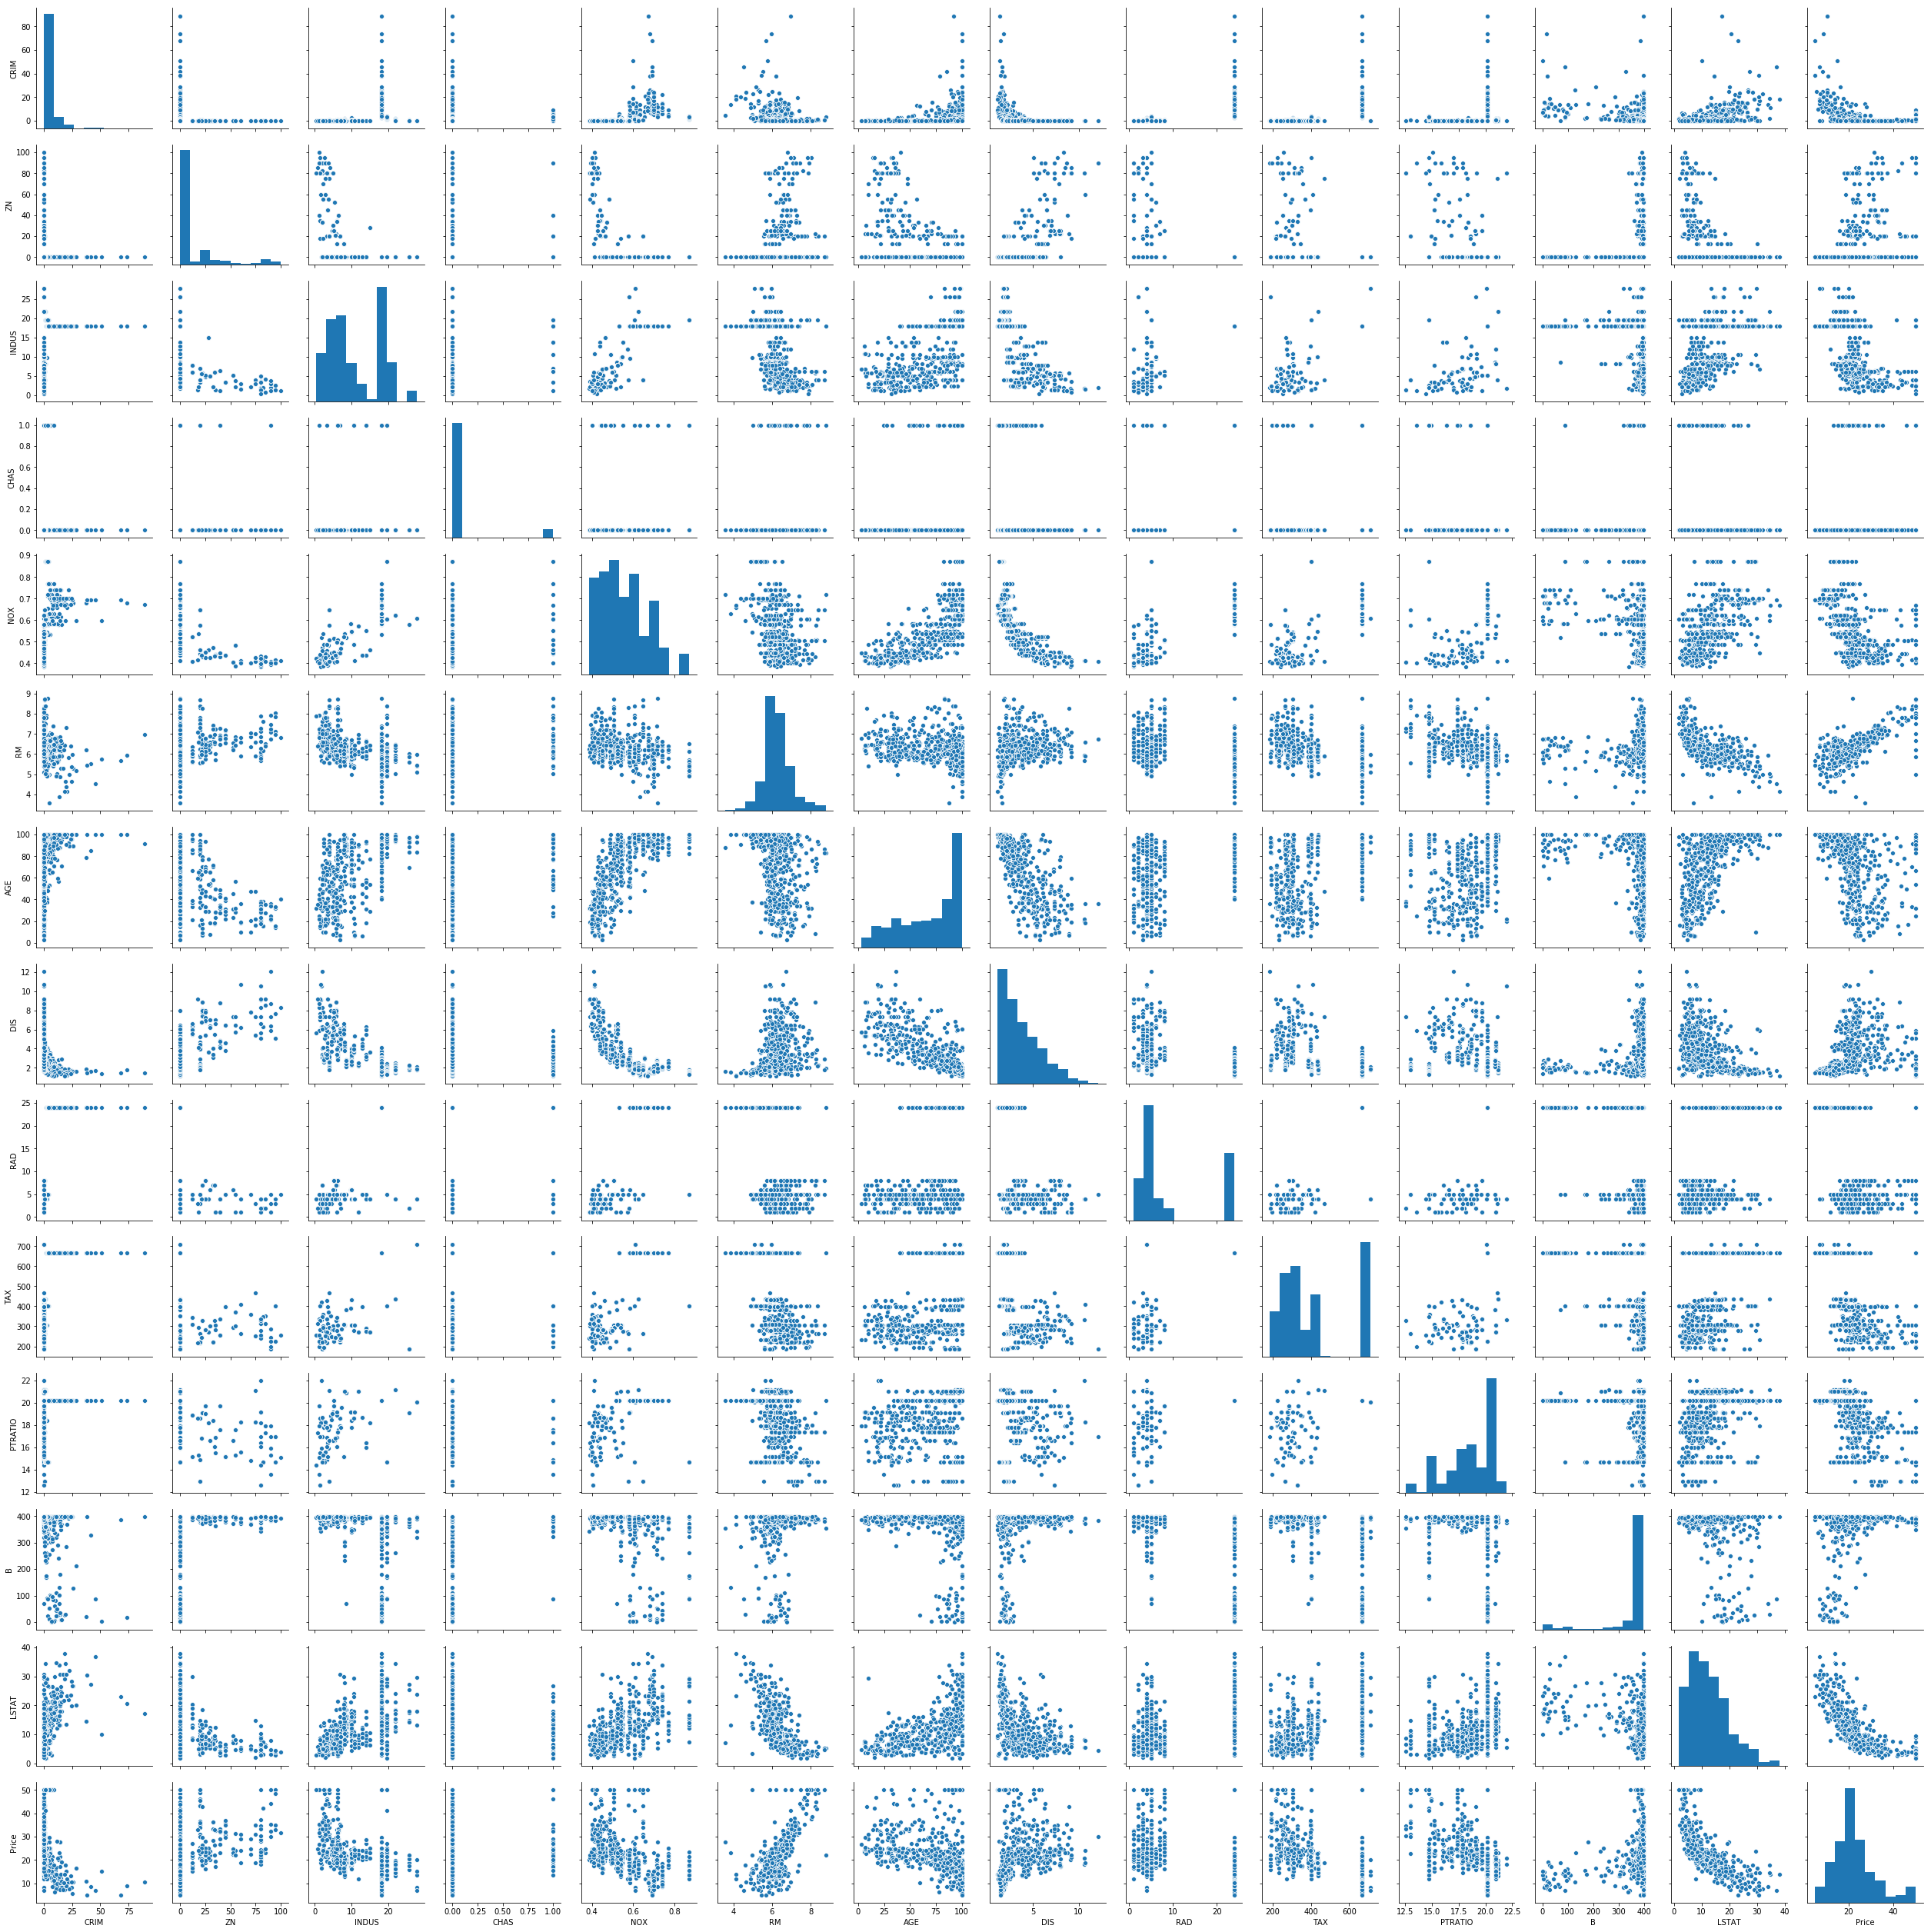

In [35]:
# Pairplot using seaborn
sns.pairplot(bos.iloc[::-1])

# Understand the correlation between variables
*** If absolute value of correlation co-efficient between 2 variables is >= 0.5,then they are strongly associated with each other. This implies, they are likely to have a stronger effect on the nature of generated model

In [36]:
bos_corr # Correlation between different columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


*** RM has High positive correlation with PRICE. PTRATIO and LSTAT have High negative CORRELATION with PRICE

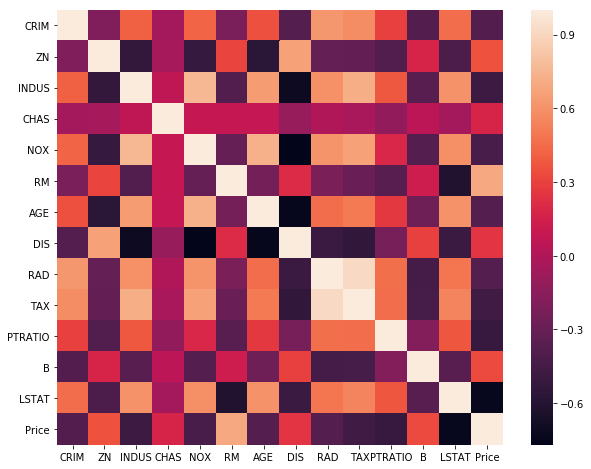

In [37]:
# Check for correlations using HEATMAP
plt.figure(figsize=(10,8))
sns.heatmap(bos_corr)

#  Train and test split

In [39]:
X = bos.drop('Price', axis = 1)
Y = bos['Price']

In [41]:
train_x,test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2,  random_state =100) # 80:20

In [42]:
print(train_x.shape)
print(test_x.shape)

(404, 13)
(102, 13)


In [44]:
print(train_y.shape)
print(test_y.shape)

(404,)
(102,)


# Fitting Regression Model

*** Baseline model

In [45]:
lm = LinearRegression()

In [46]:
model = lm.fit(X, Y) # Sklearn already considers the intercepts for linear regression

In [47]:
print("Estimated Beta Coefficients: \n", model.coef_)

Estimated Beta Coefficients: 
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [48]:
len(model.coef_)

13

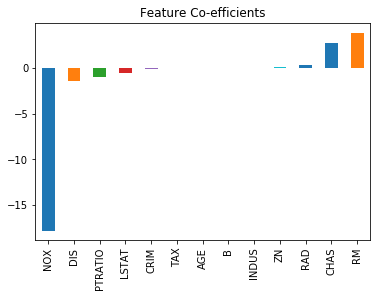

In [49]:
predictors = X.columns
coeff = pd.Series(model.coef_, predictors).sort_values()
coeff.plot(kind='bar',title='Feature Co-efficients')

In [50]:
pred_Y = model.predict(X)

In [51]:
pred_Y.mean()

22.532806324110677

In [52]:
bos.Price.mean()

22.532806324110698

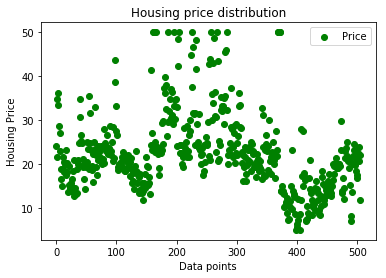

In [53]:
plt.xlabel('Data points')
plt.ylabel('Housing Price')
plt.title('Housing price distribution')
plt.scatter(range(len(Y)),Y, c= "green")
plt.legend()
plt.show()

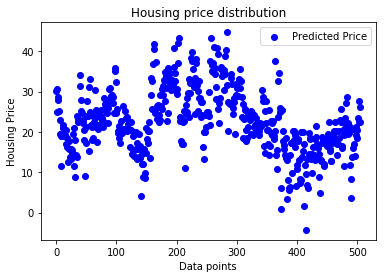

In [54]:
plt.xlabel('Data points')
plt.ylabel('Housing Price')
plt.title('Housing price distribution')
plt.scatter(range(len(pred_Y)),pred_Y, c= "blue", label = "Predicted Price")
plt.legend()
plt.show()

In [58]:
import math

#Importing mean_squared_error and r2_score from sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
rmse = math.sqrt(mean_squared_error(Y,pred_Y))
r_squared =  r2_score(Y,pred_Y)

In [60]:
print("The RMSE of model for data with all features is: ", rmse)

The RMSE of model for data with all features is:  4.679191295697282


In [61]:
print("The r2_score of model for data with all features is: ", r_squared)

The r2_score of model for data with all features is:  0.7406426641094094


In [62]:
baseline_model_metrics = [("RMSE",rmse),  ("r2_score",r_squared)]
baseline_model_metrics

[('RMSE', 4.679191295697282), ('r2_score', 0.7406426641094094)]

# Generating Model from train test split data

In [64]:
lm = LinearRegression(normalize=True)

In [65]:
model = lm.fit(train_x.values, train_y.values) # Sklearn already considers the intercepts for linear regression

In [66]:
model.coef_

array([-8.14896492e-02,  4.80407782e-02, -5.47150249e-03,  3.06260576e+00,
       -1.61368815e+01,  3.67245067e+00, -8.51525259e-03, -1.51740854e+00,
        2.87271007e-01, -1.21207598e-02, -9.24160757e-01,  9.53460812e-03,
       -4.85895548e-01])

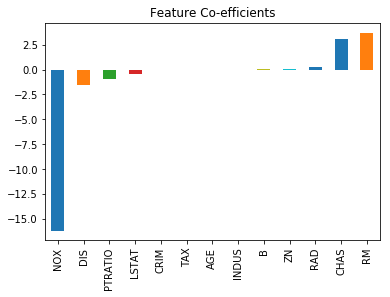

In [67]:
predictors = X.columns
coeff = pd.Series(model.coef_, predictors).sort_values()
coeff.plot(kind='bar',title='Feature Co-efficients')

In [68]:
model.intercept_

36.333770285507725

In [69]:
train_pred_y = model.predict(train_x)
test_pred_y = model.predict(test_x)

In [70]:
rmse_train = math.sqrt(mean_squared_error(train_y,train_pred_y))
rmse_test =  math.sqrt(mean_squared_error(test_y,test_pred_y))

In [71]:
print("The RMSE of model for training data with all features is: ", rmse_train )
print("The RMSE of model for test data with all features is: ", rmse_test)

The RMSE of model for training data with all features is:  4.652889093008086
The RMSE of model for test data with all features is:  4.85973189595513


In [72]:
r_squared_train = r2_score(train_y,train_pred_y)
r_squared_test = r2_score(test_y,test_pred_y)

In [73]:
print("The r2_score of model for training data with all features is: ", r_squared_train)
print("The r2_score of model for test data with all features is: ", r_squared_test)

The r2_score of model for training data with all features is:  0.7337332767917557
The r2_score of model for test data with all features is:  0.7555033086871303
